# Notebook to estimate ZEC for ACC2

ACC2 version: ACC2_v420_m1_NoCCF_Fscl_CS30_ST20_D4_A2rG4_1pctCO2

PAST simulation performed with zero GHG emissions\
FUTURE simulation starts from preindustrial conditions and follows the ZECMIP protocol for exp B.1 (1000 PgC), B.2 (750 PgC) and B.3 (2000 PgC)


In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['PROJ_LIB'] = r'C:/Users/mastr/miniconda3/pkgs/proj4-5.2.0-ha925a31_1/Library/share'
import glob
import numpy as np
import pandas as pd
#from scipy import interpolate
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.gridspec as gridspec


In [2]:
## Function for creating a path, if needed ##
def checkDir(out_path):
    if not os.path.exists(out_path):
        os.makedirs(out_path)

def gwpstar(arr,coeff1,coeff2,gwp100):
    arr_init = coeff1*arr[0:19]*gwp100
    gwparr = np.copy(arr)
    gwparr[20:gwparr.shape[0]] = coeff1*(arr[20:arr.shape[0]]*gwp100)-coeff2*(arr[0:gwparr.shape[0]-20]*gwp100)
    gwparr[0:19] = arr_init
    return(gwparr)

#### ======== Set the paths ========####

# Path for netcdf files
data_path = 'C:/Users/mastr/Documents/LSCE/ACC2_simulations'                         ## WINDOWS
#data_path = '/Users/mmastro/Documents/LSCE/Carbon Budget'               ## MAC OS

# Path for the output files (images, etc)
out_path = "C:/Users/mastr/Documents/LSCE/RESULTS"
#out_path = '/Users/mmastro/Documents/LSCE/RESULTS'


## Constants
MttoGt = 0.001
CtoCO2 = 44/12
NtoN2O = 44/14
CO2toC = 12/44

Import .csv dataset

In [3]:
path = "/ACC2_v420_m1_NoCCF_Fscl_CS30_ST20_D4_A2rG4_1pctCO2/"

df_zec_b1 = pd.read_csv((os.path.join(data_path + path + "results_future_ZECMIP-1000PgC_standard.csv")), delim_whitespace=True)
df_zec_b2 = pd.read_csv((os.path.join(data_path + path + "results_future_ZECMIP-750PgC_standard.csv")), delim_whitespace=True)
df_zec_b3 = pd.read_csv((os.path.join(data_path + path + "results_future_ZECMIP-2000PgC_standard.csv")), delim_whitespace=True)


In [9]:
# Calculate the Net Heat Content Mixed Layer
# NHCML represent the heat content of mixed layer deriving from energy exchanges with the atmosphere
# Thus at the net of heat transport from mixed layer to ocean interior
# NHCML = HCML - HCIO

df_zec_b1['NHCML'] = (df_zec_b1.HCML - df_zec_b1.HCIO)
df_zec_b2['NHCML'] = (df_zec_b2.HCML - df_zec_b2.HCIO)
df_zec_b3['NHCML'] = (df_zec_b3.HCML - df_zec_b3.HCIO)

### Plot absolute response

Text(0, 0.5, 'GtC')

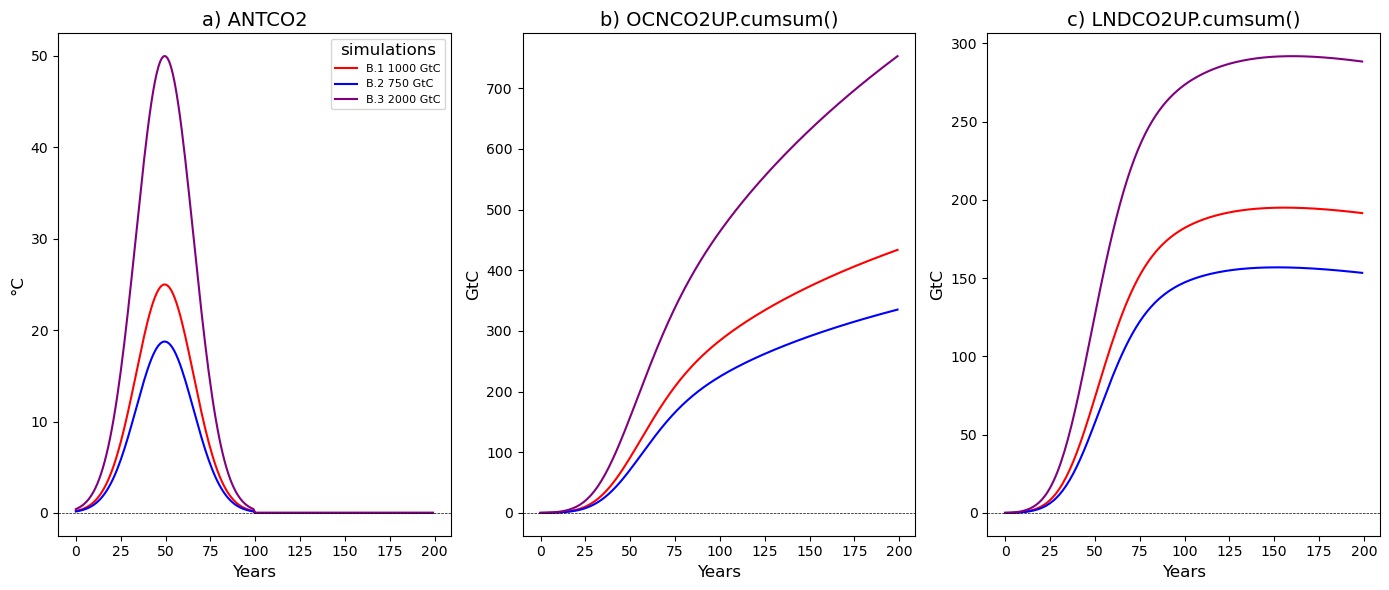

In [4]:
width_inch = 14
height_inch = 6
fig = plt.figure(figsize=(width_inch, height_inch), tight_layout=True)

ylabel = '°C'
xlabel = 'Years'
time = np.arange(0,501)

# First Plot
ax = fig.add_subplot(131)
ax.plot(time[0:200],df_zec_b1.ANTCO2[0:200],label="B.1 1000 GtC", color="red", linewidth=1.5)
ax.plot(time[0:200],df_zec_b2.ANTCO2[0:200],label="B.2 750 GtC", color="blue", linewidth=1.5)
ax.plot(time[0:200],df_zec_b3.ANTCO2[0:200],label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax.axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax.set_title('a) ANTCO2', size = 14)
ax.set_xlabel(xlabel, size = 12)
ax.set_ylabel(ylabel, size = 12)
ax.legend(title = "simulations", title_fontsize = 12,loc="upper right",fontsize=8)

# Second Plot
ax = fig.add_subplot(132)
ax.plot(time[0:200],df_zec_b1.OCNCO2UP[0:200].cumsum(),label="B.1 1000 GtC", color="red", linewidth=1.5)
ax.plot(time[0:200],df_zec_b2.OCNCO2UP[0:200].cumsum(),label="B.2 750 GtC", color="blue", linewidth=1.5)
ax.plot(time[0:200],df_zec_b3.OCNCO2UP[0:200].cumsum(),label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax.axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax.set_title('b) OCNCO2UP.cumsum()', size = 14)
ax.set_xlabel(xlabel, size = 12)
ax.set_ylabel("GtC", size = 12)

# Third Plot
ax = fig.add_subplot(133)
ax.plot(time[0:200],df_zec_b1.LNDCO2UP[0:200].cumsum(),label="B.1 1000 GtC", color="red", linewidth=1.5)
ax.plot(time[0:200],df_zec_b2.LNDCO2UP[0:200].cumsum(),label="B.2 750 GtC", color="blue", linewidth=1.5)
ax.plot(time[0:200],df_zec_b3.LNDCO2UP[0:200].cumsum(),label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax.axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax.set_title('c) LNDCO2UP.cumsum()', size = 14)
ax.set_xlabel(xlabel, size = 12)
ax.set_ylabel("GtC", size = 12)

### Plot ZEC response

Text(0, 0.5, 'ZEC (°C)')

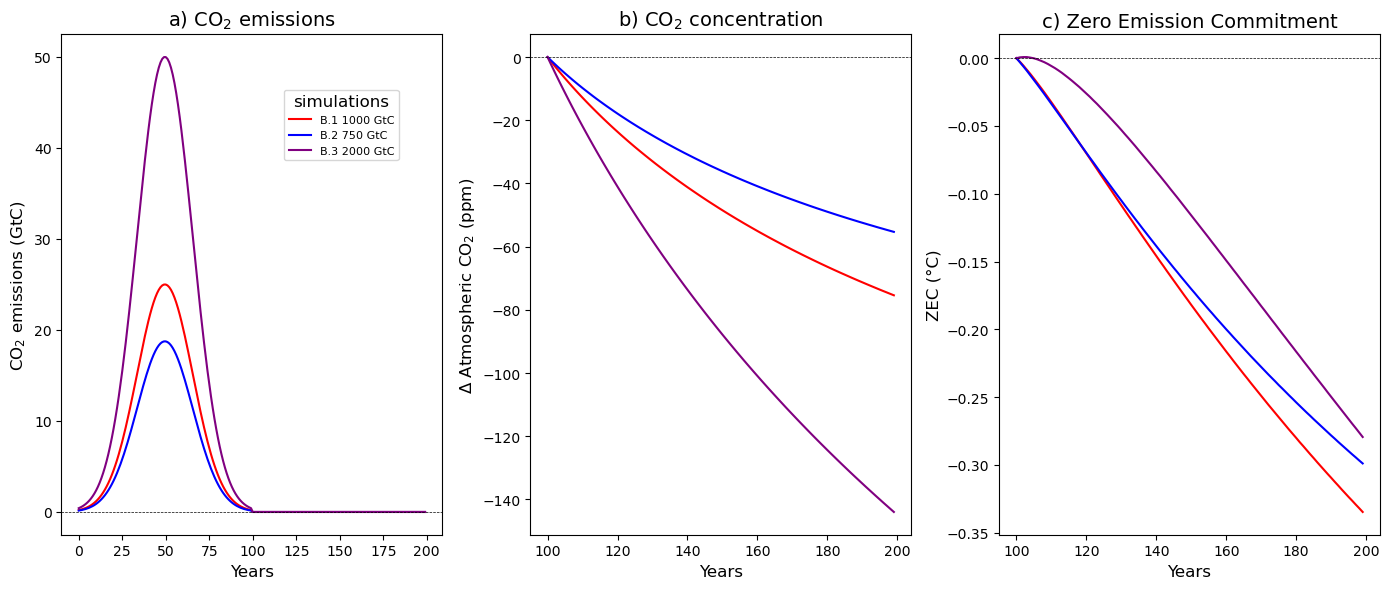

In [5]:
width_inch = 14
height_inch = 6
fig = plt.figure(figsize=(width_inch, height_inch), tight_layout=True)

ylabel = '°C'
xlabel = 'Years'
time = np.arange(0,501)

# First Plot

ax = fig.add_subplot(131)
ax.plot(time[0:200],df_zec_b1.ANTCO2[0:200],label="B.1 1000 GtC", color="red", linewidth=1.5)
ax.plot(time[0:200],df_zec_b2.ANTCO2[0:200],label="B.2 750 GtC", color="blue", linewidth=1.5)
ax.plot(time[0:200],df_zec_b3.ANTCO2[0:200],label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax.axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax.set_title('a) CO$_2$ emissions', size = 14)
ax.set_xlabel(xlabel, size = 12)
ax.set_ylabel("CO$_2$ emissions (GtC)", size = 12)
ax.legend(title = "simulations", title_fontsize = 12,bbox_to_anchor=(0.9, 0.9),fontsize=8)

# Second Plot
dco2_b1 = (df_zec_b1.CONCO2 - df_zec_b1.CONCO2[100]) #[100:]
dco2_b2 = (df_zec_b2.CONCO2 - df_zec_b2.CONCO2[100]) #[100:]
dco2_b3 = (df_zec_b3.CONCO2 - df_zec_b3.CONCO2[100]) #[100:]

ax = fig.add_subplot(132)
ax.plot(time[100:200],dco2_b1[100:200],label="B.1 1000 GtC", color="red", linewidth=1.5)
ax.plot(time[100:200],dco2_b2[100:200],label="B.2 750 GtC", color="blue", linewidth=1.5)
ax.plot(time[100:200],dco2_b3[100:200],label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax.axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
# ax.set_ylim(1,3.5)
ax.set_title('b) CO$_2$ concentration', size = 14)
ax.set_xlabel(xlabel, size = 12)
ax.set_ylabel("\u0394 Atmospheric CO$_2$ (ppm)", size = 12)

# Second Plot
zec_b1 = (df_zec_b1.T2M - df_zec_b1.T2M[100]) #[100:]
zec_b2 = (df_zec_b2.T2M - df_zec_b2.T2M[100]) #[100:]
zec_b3 = (df_zec_b3.T2M - df_zec_b3.T2M[100]) #[100:]

ax = fig.add_subplot(133)
ax.plot(time[100:200],zec_b1[100:200],label="B.1 1000 GtC", color="red", linewidth=1.5)
ax.plot(time[100:200],zec_b2[100:200],label="B.2 750 GtC", color="blue", linewidth=1.5)
ax.plot(time[100:200],zec_b3[100:200],label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax.axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax.set_title('c) Zero Emission Commitment', size = 14)
ax.set_xlabel(xlabel, size = 12)
ax.set_ylabel("ZEC (°C)", size = 12)

In [6]:
print(zec_b1.iloc[25]); print(zec_b2.iloc[50]); print((zec_b3.iloc[50]))

-1.8960000000000001
-0.7593000000000001
-1.6977999999999998


Plot several variables from 0 to 200 years

Text(0, 0.5, 'Land CO2 Uptake (GtC)')

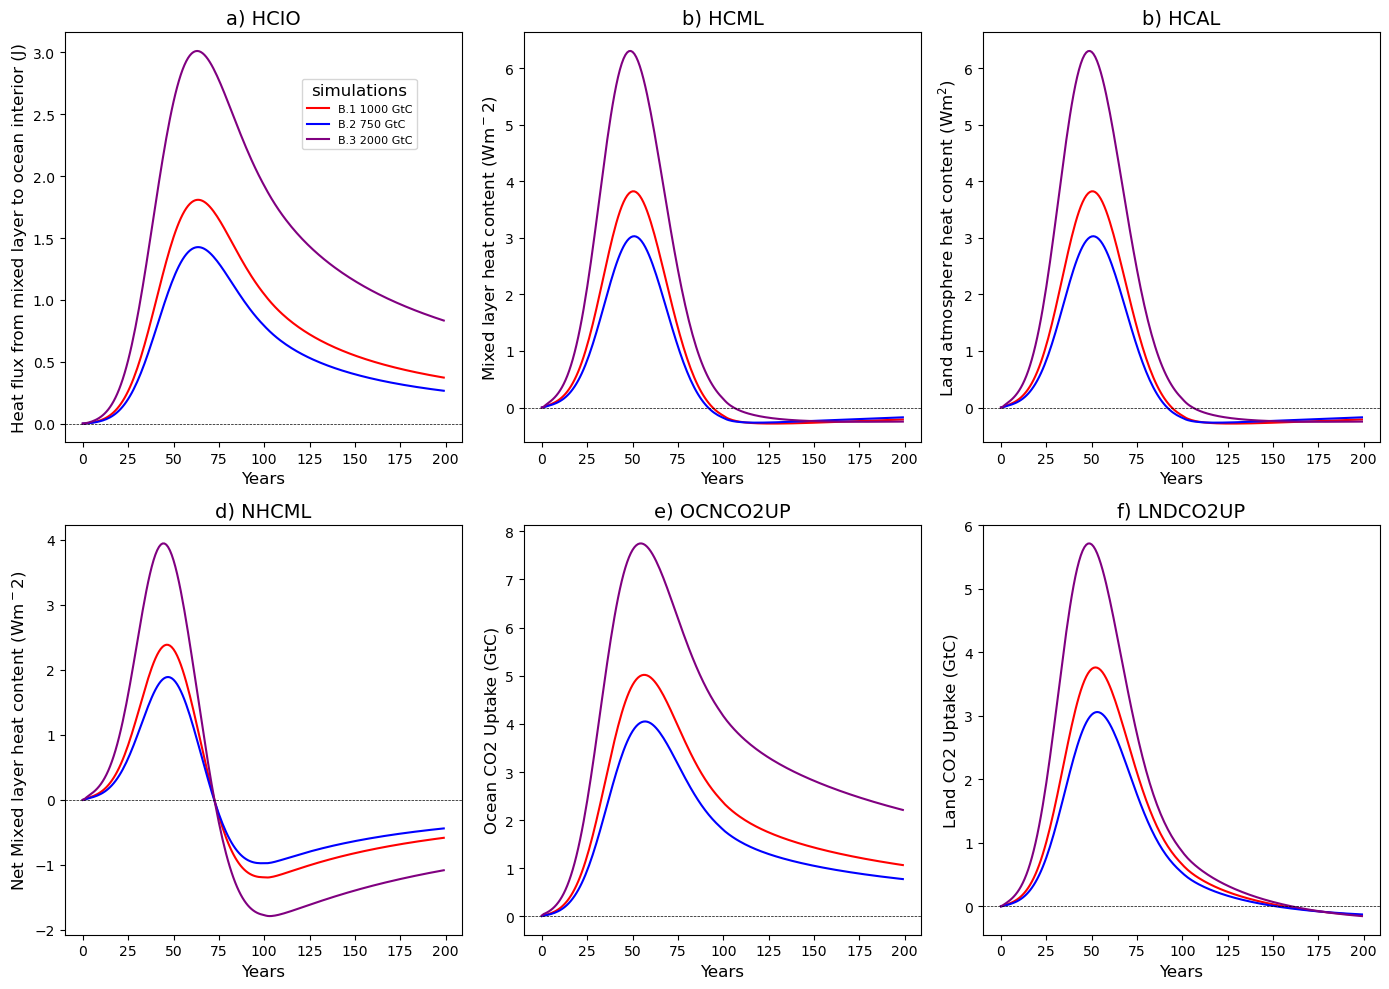

In [10]:
width_inch = 14
height_inch = 10

fig, ax = plt.subplots(2, 3, figsize=(width_inch, height_inch), tight_layout = True)

xlabel = 'Years'
time = np.arange(0,200)

# First Plot
zec_b1 = (df_zec_b1.HCIO - df_zec_b1.HCIO[100])[100:]
zec_b2 = (df_zec_b2.HCIO - df_zec_b2.HCIO[100])[100:]
zec_b3 = (df_zec_b3.HCIO - df_zec_b3.HCIO[100])[100:]

ax[0,0].plot(time,df_zec_b1.HCIO[0:200],label="B.1 1000 GtC", color="red", linewidth=1.5)
ax[0,0].plot(time,df_zec_b2.HCIO[0:200],label="B.2 750 GtC", color="blue", linewidth=1.5)
ax[0,0].plot(time,df_zec_b3.HCIO[0:200],label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax[0,0].axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
# ax[0,0].set_ylim(1,3.5)
ax[0,0].set_title('a) HCIO', size = 14)
ax[0,0].set_xlabel(xlabel, size = 12)
ax[0,0].set_ylabel("Heat flux from mixed layer to ocean interior (J)", size = 12)
ax[0,0].legend(title = "simulations", title_fontsize = 12,bbox_to_anchor=(0.9, 0.9),fontsize=8)

# Second Plot
zec_b1 = (df_zec_b1.HCML - df_zec_b1.HCML[100])[100:]
zec_b2 = (df_zec_b2.HCML - df_zec_b2.HCML[100])[100:]
zec_b3 = (df_zec_b3.HCML - df_zec_b3.HCML[100])[100:]

ax[0,1].plot(time,df_zec_b1.HCML[0:200],label="B.1 1000 GtC", color="red", linewidth=1.5)
ax[0,1].plot(time,df_zec_b2.HCML[0:200],label="B.2 750 GtC", color="blue", linewidth=1.5)
ax[0,1].plot(time,df_zec_b3.HCML[0:200],label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax[0,1].axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax[0,1].set_title('b) HCML', size = 14)
ax[0,1].set_xlabel(xlabel, size = 12)
ax[0,1].set_ylabel("Mixed layer heat content (Wm$^-2$)", size = 12)

# Third Plot
zec_b1 = (df_zec_b1.HCAL - df_zec_b1.HCAL[100])[100:]
zec_b2 = (df_zec_b2.HCAL - df_zec_b2.HCAL[100])[100:]
zec_b3 = (df_zec_b3.HCAL - df_zec_b3.HCAL[100])[100:]

ax[0,2].plot(time,df_zec_b1.HCML[0:200],label="B.1 1000 GtC", color="red", linewidth=1.5)
ax[0,2].plot(time,df_zec_b2.HCML[0:200],label="B.2 750 GtC", color="blue", linewidth=1.5)
ax[0,2].plot(time,df_zec_b3.HCML[0:200],label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax[0,2].axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax[0,2].set_title('b) HCAL', size = 14)
ax[0,2].set_xlabel(xlabel, size = 12)
ax[0,2].set_ylabel("Land atmosphere heat content (Wm$^2$)", size = 12)

# Fourth Plot
# time = np.arange(100,499)

zec_b1 = (df_zec_b1.NHCML - df_zec_b1.NHCML[100])[100:499]
zec_b2 = (df_zec_b2.NHCML - df_zec_b2.NHCML[100])[100:499]
zec_b3 = (df_zec_b3.NHCML - df_zec_b3.NHCML[100])[100:499]

ax[1,0].plot(time,df_zec_b1.NHCML[0:200],label="B.1 1000 GtC", color="red", linewidth=1.5)
ax[1,0].plot(time,df_zec_b2.NHCML[0:200],label="B.2 750 GtC", color="blue", linewidth=1.5)
ax[1,0].plot(time,df_zec_b3.NHCML[0:200],label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax[1,0].axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
# ax[1,0].set_ylim(1,3.5)
ax[1,0].set_title('d) NHCML', size = 14)
ax[1,0].set_xlabel(xlabel, size = 12)
ax[1,0].set_ylabel("Net Mixed layer heat content (Wm$^-2$)", size = 12)

# Fifth Plot
zec_b1 = (df_zec_b1.OCNCO2UP - df_zec_b1.OCNCO2UP[100])[100:499]
zec_b2 = (df_zec_b2.OCNCO2UP - df_zec_b2.OCNCO2UP[100])[100:499]
zec_b3 = (df_zec_b3.OCNCO2UP - df_zec_b3.OCNCO2UP[100])[100:499]

ax[1,1].plot(time,df_zec_b1.OCNCO2UP[0:200],label="B.1 1000 GtC", color="red", linewidth=1.5)
ax[1,1].plot(time,df_zec_b2.OCNCO2UP[0:200],label="B.2 750 GtC", color="blue", linewidth=1.5)
ax[1,1].plot(time,df_zec_b3.OCNCO2UP[0:200],label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax[1,1].axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
# ax[1,1].set_ylim(1,3.5)
ax[1,1].set_title('e) OCNCO2UP', size = 14)
ax[1,1].set_xlabel(xlabel, size = 12)
ax[1,1].set_ylabel("Ocean CO2 Uptake (GtC)", size = 12)

# Sixth Plot
zec_b1 = (df_zec_b1.LNDCO2UP - df_zec_b1.LNDCO2UP[100])[100:499]
zec_b2 = (df_zec_b2.LNDCO2UP - df_zec_b2.LNDCO2UP[100])[100:499]
zec_b3 = (df_zec_b3.LNDCO2UP - df_zec_b3.LNDCO2UP[100])[100:499]

ax[1,2].plot(time,df_zec_b1.LNDCO2UP[0:200],label="B.1 1000 GtC", color="red", linewidth=1.5)
ax[1,2].plot(time,df_zec_b2.LNDCO2UP[0:200],label="B.2 750 GtC", color="blue", linewidth=1.5)
ax[1,2].plot(time,df_zec_b3.LNDCO2UP[0:200],label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax[1,2].axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax[1,2].set_title('f) LNDCO2UP', size = 14)
ax[1,2].set_xlabel(xlabel, size = 12)
ax[1,2].set_ylabel("Land CO2 Uptake (GtC)", size = 12)

# fig.delaxes(ax[1, 2])

### Drivers of ZEC

Convert GtC of Ocean and Land Carbon Uptake to Radiative Forcing (Wm-2)

In [14]:
# Convert GtC of Ocean and Land Carbon Uptake to Radiative Forcing (Wm-2)

co2_radeff = 1.33*1e-5       # Wm-2ppb-2 (from IPCC-AR6 Table 7.15)
GtC_to_ppm = 1/2.124        # 1 ppm = 2.124 GtC

for data in [df_zec_b1, df_zec_b2, df_zec_b3]:

    data.OCNCO2UP = data.OCNCO2UP*(GtC_to_ppm)*1e3    # from ppm to ppb
    data.OCNCO2UP = data.OCNCO2UP*co2_radeff      

    data.LNDCO2UP = data.LNDCO2UP*(GtC_to_ppm)*1e3    # from ppm to ppb
    data.LNDCO2UP = data.LNDCO2UP*co2_radeff 



In [15]:
# Calculate the Net Heat Content Mixed Layer
# NHCML represent the heat content of mixed layer deriving from energy exchanges with the atmosphere
# Thus at the net of heat transport from mixed layer to ocean interior
# NHCML = HCML - HCIO

df_zec_b1['NHCML'] = (df_zec_b1.HCML - df_zec_b1.HCIO)
df_zec_b2['NHCML'] = (df_zec_b2.HCML - df_zec_b2.HCIO)
df_zec_b3['NHCML'] = (df_zec_b3.HCML - df_zec_b3.HCIO)

Text(0, 0.5, 'Net Mixed layer heat content (Wm$^2$)')

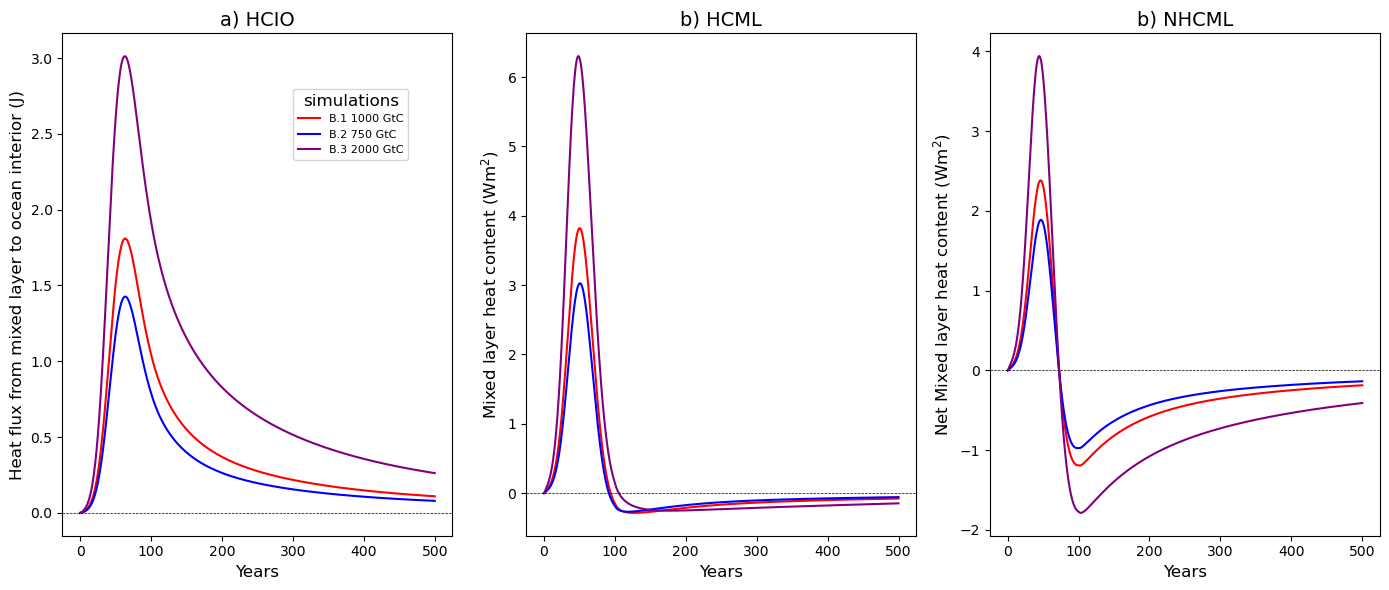

In [16]:
width_inch = 14
height_inch = 6
fig = plt.figure(figsize=(width_inch, height_inch), tight_layout=True)

xlabel = 'Years'
time = np.arange(0,501)

# First Plot

zec_b1 = (df_zec_b1.HCIO - df_zec_b1.HCIO[100])[100:]
zec_b2 = (df_zec_b2.HCIO - df_zec_b2.HCIO[100])[100:]
zec_b3 = (df_zec_b3.HCIO - df_zec_b3.HCIO[100])[100:]

ax = fig.add_subplot(131)
ax.plot(time,df_zec_b1.HCIO,label="B.1 1000 GtC", color="red", linewidth=1.5)
ax.plot(time,df_zec_b2.HCIO,label="B.2 750 GtC", color="blue", linewidth=1.5)
ax.plot(time,df_zec_b3.HCIO,label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax.axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
# ax.set_ylim(1,3.5)
ax.set_title('a) HCIO', size = 14)
ax.set_xlabel(xlabel, size = 12)
ax.set_ylabel("Heat flux from mixed layer to ocean interior (J)", size = 12)
ax.legend(title = "simulations", title_fontsize = 12,bbox_to_anchor=(0.9, 0.9),fontsize=8)

# Second Plot

zec_b1 = (df_zec_b1.HCML - df_zec_b1.HCML[100])[100:]
zec_b2 = (df_zec_b2.HCML - df_zec_b2.HCML[100])[100:]
zec_b3 = (df_zec_b3.HCML - df_zec_b3.HCML[100])[100:]

ax = fig.add_subplot(132)
ax.plot(time,df_zec_b1.HCML,label="B.1 1000 GtC", color="red", linewidth=1.5)
ax.plot(time,df_zec_b2.HCML,label="B.2 750 GtC", color="blue", linewidth=1.5)
ax.plot(time,df_zec_b3.HCML,label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax.axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax.set_title('b) HCML', size = 14)
ax.set_xlabel(xlabel, size = 12)
ax.set_ylabel("Mixed layer heat content (Wm$^2$)", size = 12)

# Third Plot

zec_b1 = (df_zec_b1.HCAL - df_zec_b1.HCAL[100])[100:]
zec_b2 = (df_zec_b2.HCAL - df_zec_b2.HCAL[100])[100:]
zec_b3 = (df_zec_b3.HCAL - df_zec_b3.HCAL[100])[100:]

ax = fig.add_subplot(133)
ax.plot(time,df_zec_b1.NHCML,label="B.1 1000 GtC", color="red", linewidth=1.5)
ax.plot(time,df_zec_b2.NHCML,label="B.2 750 GtC", color="blue", linewidth=1.5)
ax.plot(time,df_zec_b3.NHCML,label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax.axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax.set_title('b) NHCML', size = 14)
ax.set_xlabel(xlabel, size = 12)
ax.set_ylabel("Net Mixed layer heat content (Wm$^2$)", size = 12)




Why the Mixed Layer Heat Content is negative??? Is it representing the Heat Flux from the Atmosphere to Mixed Layer instead?

Text(0, 0.5, 'Land CO2 Uptake (Wm$^-2$)')

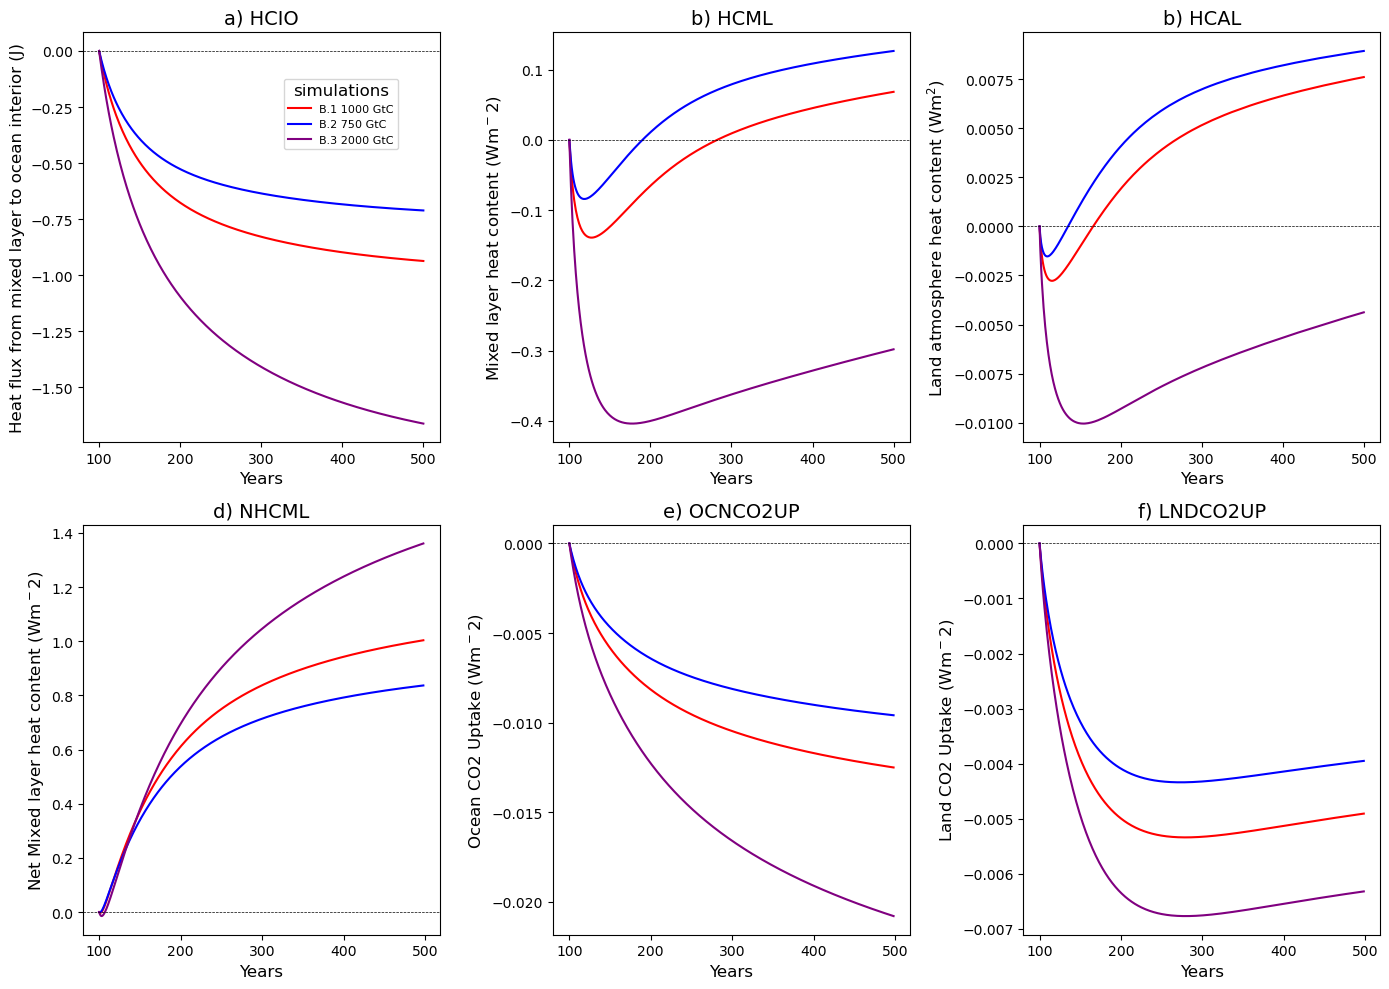

In [21]:
width_inch = 14
height_inch = 10

fig, ax = plt.subplots(2, 3, figsize=(width_inch, height_inch), tight_layout = True)

xlabel = 'Years'
time = np.arange(100,501)

# First Plot
zec_b1 = (df_zec_b1.HCIO - df_zec_b1.HCIO[100])[100:]
zec_b2 = (df_zec_b2.HCIO - df_zec_b2.HCIO[100])[100:]
zec_b3 = (df_zec_b3.HCIO - df_zec_b3.HCIO[100])[100:]

ax[0,0].plot(time,zec_b1,label="B.1 1000 GtC", color="red", linewidth=1.5)
ax[0,0].plot(time,zec_b2,label="B.2 750 GtC", color="blue", linewidth=1.5)
ax[0,0].plot(time,zec_b3,label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax[0,0].axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
# ax[0,0].set_ylim(1,3.5)
ax[0,0].set_title('a) HCIO', size = 14)
ax[0,0].set_xlabel(xlabel, size = 12)
ax[0,0].set_ylabel("Heat flux from mixed layer to ocean interior (J)", size = 12)
ax[0,0].legend(title = "simulations", title_fontsize = 12,bbox_to_anchor=(0.9, 0.9),fontsize=8)

# Second Plot
zec_b1 = (df_zec_b1.HCML - df_zec_b1.HCML[100])[100:]
zec_b2 = (df_zec_b2.HCML - df_zec_b2.HCML[100])[100:]
zec_b3 = (df_zec_b3.HCML - df_zec_b3.HCML[100])[100:]

ax[0,1].plot(time,zec_b1,label="B.1 1000 GtC", color="red", linewidth=1.5)
ax[0,1].plot(time,zec_b2,label="B.2 750 GtC", color="blue", linewidth=1.5)
ax[0,1].plot(time,zec_b3,label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax[0,1].axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax[0,1].set_title('b) HCML', size = 14)
ax[0,1].set_xlabel(xlabel, size = 12)
ax[0,1].set_ylabel("Mixed layer heat content (Wm$^-2$)", size = 12)

# Third Plot
zec_b1 = (df_zec_b1.HCAL - df_zec_b1.HCAL[100])[100:]
zec_b2 = (df_zec_b2.HCAL - df_zec_b2.HCAL[100])[100:]
zec_b3 = (df_zec_b3.HCAL - df_zec_b3.HCAL[100])[100:]

ax[0,2].plot(time,zec_b1,label="B.1 1000 GtC", color="red", linewidth=1.5)
ax[0,2].plot(time,zec_b2,label="B.2 750 GtC", color="blue", linewidth=1.5)
ax[0,2].plot(time,zec_b3,label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax[0,2].axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax[0,2].set_title('b) HCAL', size = 14)
ax[0,2].set_xlabel(xlabel, size = 12)
ax[0,2].set_ylabel("Land atmosphere heat content (Wm$^2$)", size = 12)

# Fourth Plot
time = np.arange(100,499)

zec_b1 = (df_zec_b1.NHCML - df_zec_b1.NHCML[100])[100:499]
zec_b2 = (df_zec_b2.NHCML - df_zec_b2.NHCML[100])[100:499]
zec_b3 = (df_zec_b3.NHCML - df_zec_b3.NHCML[100])[100:499]

ax[1,0].plot(time,zec_b1,label="B.1 1000 GtC", color="red", linewidth=1.5)
ax[1,0].plot(time,zec_b2,label="B.2 750 GtC", color="blue", linewidth=1.5)
ax[1,0].plot(time,zec_b3,label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax[1,0].axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
# ax[1,0].set_ylim(1,3.5)
ax[1,0].set_title('d) NHCML', size = 14)
ax[1,0].set_xlabel(xlabel, size = 12)
ax[1,0].set_ylabel("Net Mixed layer heat content (Wm$^-2$)", size = 12)

# Fifth Plot
zec_b1 = (df_zec_b1.OCNCO2UP - df_zec_b1.OCNCO2UP[100])[100:499]
zec_b2 = (df_zec_b2.OCNCO2UP - df_zec_b2.OCNCO2UP[100])[100:499]
zec_b3 = (df_zec_b3.OCNCO2UP - df_zec_b3.OCNCO2UP[100])[100:499]

ax[1,1].plot(time,zec_b1,label="B.1 1000 GtC", color="red", linewidth=1.5)
ax[1,1].plot(time,zec_b2,label="B.2 750 GtC", color="blue", linewidth=1.5)
ax[1,1].plot(time,zec_b3,label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax[1,1].axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
# ax[1,1].set_ylim(1,3.5)
ax[1,1].set_title('e) OCNCO2UP', size = 14)
ax[1,1].set_xlabel(xlabel, size = 12)
ax[1,1].set_ylabel("Ocean CO2 Uptake (Wm$^-2$)", size = 12)

# Sixth Plot
zec_b1 = (df_zec_b1.LNDCO2UP - df_zec_b1.LNDCO2UP[100])[100:499]
zec_b2 = (df_zec_b2.LNDCO2UP - df_zec_b2.LNDCO2UP[100])[100:499]
zec_b3 = (df_zec_b3.LNDCO2UP - df_zec_b3.LNDCO2UP[100])[100:499]

ax[1,2].plot(time,zec_b1,label="B.1 1000 GtC", color="red", linewidth=1.5)
ax[1,2].plot(time,zec_b2,label="B.2 750 GtC", color="blue", linewidth=1.5)
ax[1,2].plot(time,zec_b3,label="B.3 2000 GtC", color="purple", linewidth=1.5)
ax[1,2].axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax[1,2].set_title('f) LNDCO2UP', size = 14)
ax[1,2].set_xlabel(xlabel, size = 12)
ax[1,2].set_ylabel("Land CO2 Uptake (Wm$^-2$)", size = 12)

# fig.delaxes(ax[1, 2])

<AxesSubplot: >

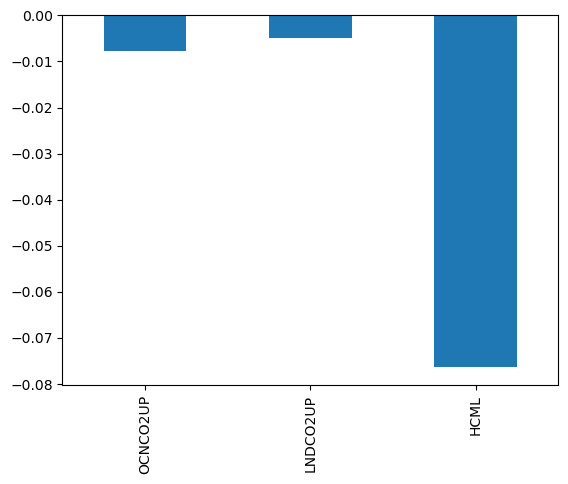

In [20]:
zec_b1 = (df_zec_b1 - df_zec_b1.iloc[100]); zec_b1
zec_b1.iloc[190][['OCNCO2UP','LNDCO2UP','HCML']].plot.bar(stacked=True)

### ZECMIP estimated from ESMs and EMICs

In [51]:
path = "/ZECMIP_models/"


all_files = []
all_files = glob.glob(os.path.join(data_path + path +"tas_*.csv"))
# df = pd.concat((pd.read_csv(f, delim_whitespace=True) for f in all_files), ignore_index=True)

dfs = list()
for f in all_files:
    model = os.path.basename(f).split('_')[1]
    data = pd.read_csv(f,  names = ["year","tas-{}".format(model)])
    data = data.drop(labels = "year", axis = 1)
    if data.iloc[0].values > 200:
        data = data - 273.15
    dfs.append(data)

df_tas_zec = pd.concat(dfs, axis = 1)
df_tas_zec

,tas-Bern3D-LPX-ECS2K,tas-DCESS1.0,tas-GFDL-ESM2M,tas-IAPRAS,tas-LOVECLIM,tas-MESM,tas-MIROC-lite-LCM,tas-PLASIM-GENIE,tas-UVicESCM2.10
0,14.321242,15.082,13.640625,13.249994,16.027,13.2593,11.93059,13.661,13.414209
1,14.321066,15.082,13.860851,13.260004,16.070,13.2837,11.93586,13.585,13.430627
2,14.316253,15.082,13.905329,13.260004,16.008,13.2721,11.93879,13.626,13.441705
3,14.315893,15.083,13.540661,13.260004,16.039,13.2976,11.94094,13.614,13.446863
4,14.323089,15.084,13.571711,13.270013,16.130,13.3014,11.94178,13.672,13.451196
...,...,...,...,...,...,...,...,...,...
1195,NaN,NaN,NaN,NaN,NaN,14.6614,12.50977,NaN,NaN
1196,NaN,NaN,NaN,NaN,NaN,14.6467,12.51000,NaN,NaN
1197,NaN,NaN,NaN,NaN,NaN,14.6543,12.51016,NaN,NaN
1198,NaN,NaN,NaN,NaN,NaN,14.6409,12.50990,NaN,NaN


In [54]:
# Calculate ZEC as the temperature relative to year 100

df_tas_zec = (df_tas_zec - df_tas_zec.iloc[100])[100:]

In [74]:
print(df_tas_zec.iloc[25])

tas-Bern3D-LPX-ECS2K   -0.056749
tas-DCESS1.0           -0.050000
tas-GFDL-ESM2M         -0.153650
tas-IAPRAS             -0.059997
tas-LOVECLIM           -0.002000
tas-MESM               -0.029400
tas-MIROC-lite-LCM     -0.040580
tas-PLASIM-GENIE       -0.151000
tas-UVicESCM2.10       -0.033844
Name: 125, dtype: float64


In [ ]:
-0.056749
-0.050000
-0.153650
-0.059997
-0.002000
-0.029400
-0.040580
-0.151000
-0.033844